# New York City AirBnB Data

## Data Preparation and Cleaning

The dataset contains AirBnB listing activities and metrics for the five boroughs of New York (Brooklyn, Manhattan, Queens, Bronx and Staten Island), from 2011 to 2019. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
## Last five entries
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
## Count the number of empty cells in each column
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
## Remove empty entries in 'last_review' and 'reviews_per_month'
df.dropna(subset = ['last_review', 'reviews_per_month'], inplace = True)

In [6]:
## Removes 'host-id', 'host_name', 'latitude' and 'longitude'
df.drop(columns= ['name', 'host_id', 'host_name', 'latitude', 'longitude'], inplace = True)

In [7]:
### change the 'last_review' column into a date column
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
## Extract the last review month and year from the last review date
df['last_review_month'] = round(pd.to_datetime(df['last_review']).dt.month, 0)
df['last_review_year'] = round(pd.to_datetime(df['last_review']).dt.year, 0)

In [9]:
df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,10,2018
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,2019
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7,2019
4,5022,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11,2018
5,5099,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,6,2019


In [10]:
## Unique values in each column of df
df.nunique()

id                                38843
neighbourhood_group                   5
neighbourhood                       218
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
last_review_month                    12
last_review_year                      9
dtype: int64

In [11]:
## Basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38843 entries, 0 to 48852
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38843 non-null  int64         
 1   neighbourhood_group             38843 non-null  object        
 2   neighbourhood                   38843 non-null  object        
 3   room_type                       38843 non-null  object        
 4   price                           38843 non-null  int64         
 5   minimum_nights                  38843 non-null  int64         
 6   number_of_reviews               38843 non-null  int64         
 7   last_review                     38843 non-null  datetime64[ns]
 8   reviews_per_month               38843 non-null  float64       
 9   calculated_host_listings_count  38843 non-null  int64         
 10  availability_365                38843 non-null  int64         
 11  last_re

In [12]:
## Receive descriptive statistics for the numerical columns
df.describe()

,id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,142.317947,5.868059,29.297557,2018-10-04 01:47:23.910099712,1.373221,5.164457,114.882888,6.173571,2018.287722
min,2.539000e+03,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000,1.000000,2011.000000
25%,8.720027e+06,69.000000,1.000000,3.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000,5.000000,2018.000000
50%,1.887146e+07,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000,6.000000,2019.000000
75%,2.755482e+07,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000,7.000000,2019.000000
max,3.645581e+07,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,12.000000,2019.000000
std,1.069370e+07,196.945624,17.384784,48.186374,NaN,1.680442,26.295665,129.543636,2.532065,1.181165


## Data Exploration

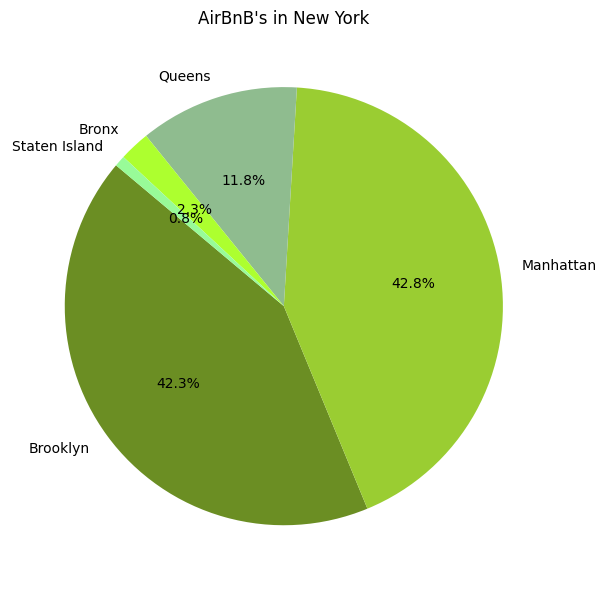

In [13]:
## Plot a count of each district 

brooklyn_neighbourhoods = df[df['neighbourhood_group'] == 'Brooklyn'].shape[0]
manhattan_neighbourhoods = df[df['neighbourhood_group'] == 'Manhattan'].shape[0]
queens_neighbourhoods = df[df['neighbourhood_group'] == 'Queens'].shape[0]
bronx_neighbourhoods = df[df['neighbourhood_group'] == 'Bronx'].shape[0]
statenisland_neighbourhoods = df[df['neighbourhood_group'] == 'Staten Island'].shape[0]

x = ["Brooklyn", "Manhattan", "Queens", "Bronx", "Staten Island"]
z = [brooklyn_neighbourhoods, manhattan_neighbourhoods, queens_neighbourhoods, bronx_neighbourhoods, statenisland_neighbourhoods]

#colors = ['forestgreen', 'limegreen', 'mediumseagreen', 'lime', 'darkgreen']
#colors = ['orangered', 'red', 'darkred', 'firebrick', 'mistyrose']
colors = ['olivedrab', 'yellowgreen', 'darkseagreen', 'greenyellow', 'palegreen']
plt.figure(figsize = (15, 6))
plt.pie(z, labels = x, autopct = '%1.1f%%', startangle = 140, colors = colors)
plt.title("AirBnB's in New York")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Price of Accommodation Per Year and District')

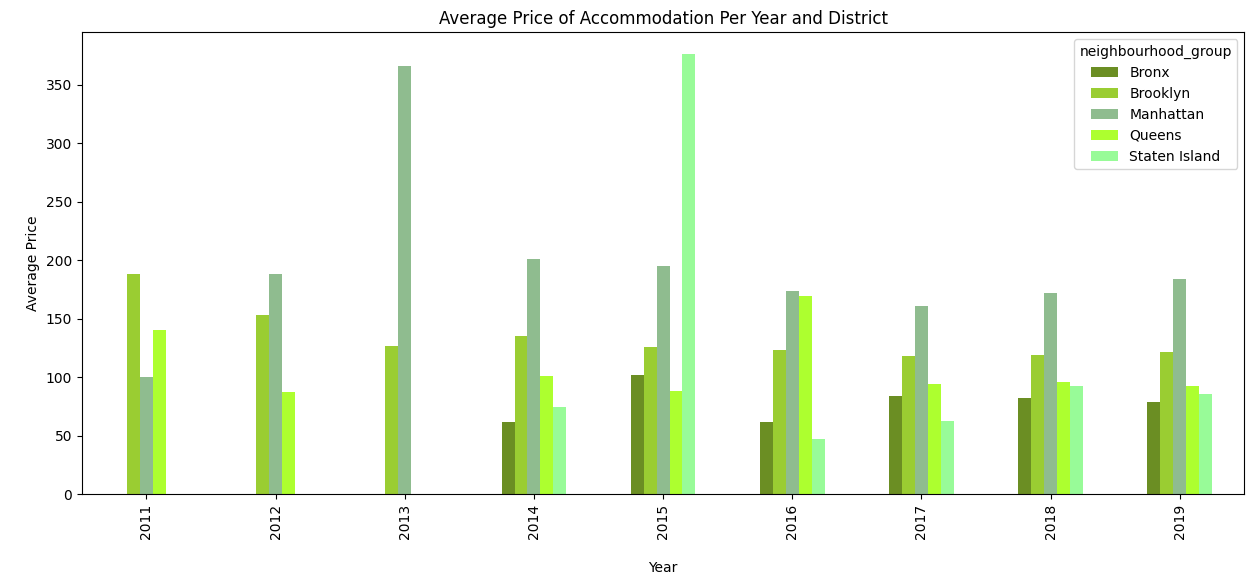

In [14]:
## What was the average price of accommodation, per district, per year?
year_neighbourhood_sales = df.groupby(['last_review_year','neighbourhood_group'])['price'].mean()
year_sales_neighbourhood = year_neighbourhood_sales.unstack()
year_sales_neighbourhood.plot(kind = "bar", figsize = (15,6), color = colors)
plt.xlabel("\nYear")
plt.ylabel("\nAverage Price")
plt.title("Average Price of Accommodation Per Year and District")

Text(0.5, 1.0, 'Average Price of Accommodation Per District')

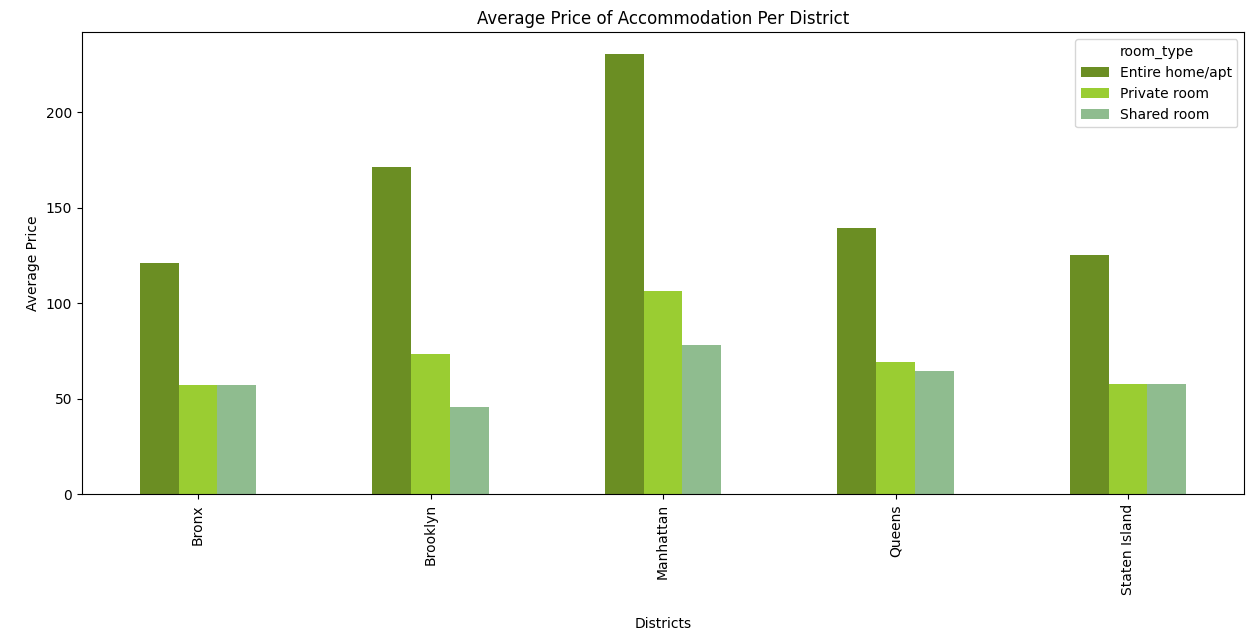

In [15]:
## What was the average price of accommodation, per room type, per district?
room_neighbourhood_sales = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
room_sales_neighbourhood = room_neighbourhood_sales.unstack()
room_sales_neighbourhood.plot(kind = 'bar', figsize = (15,6), color = colors)
plt.xlabel("\nDistricts")
plt.ylabel("\nAverage Price")
plt.title("Average Price of Accommodation Per District")

Text(0.5, 1.0, 'Relationship between Minimum Nights and Price')

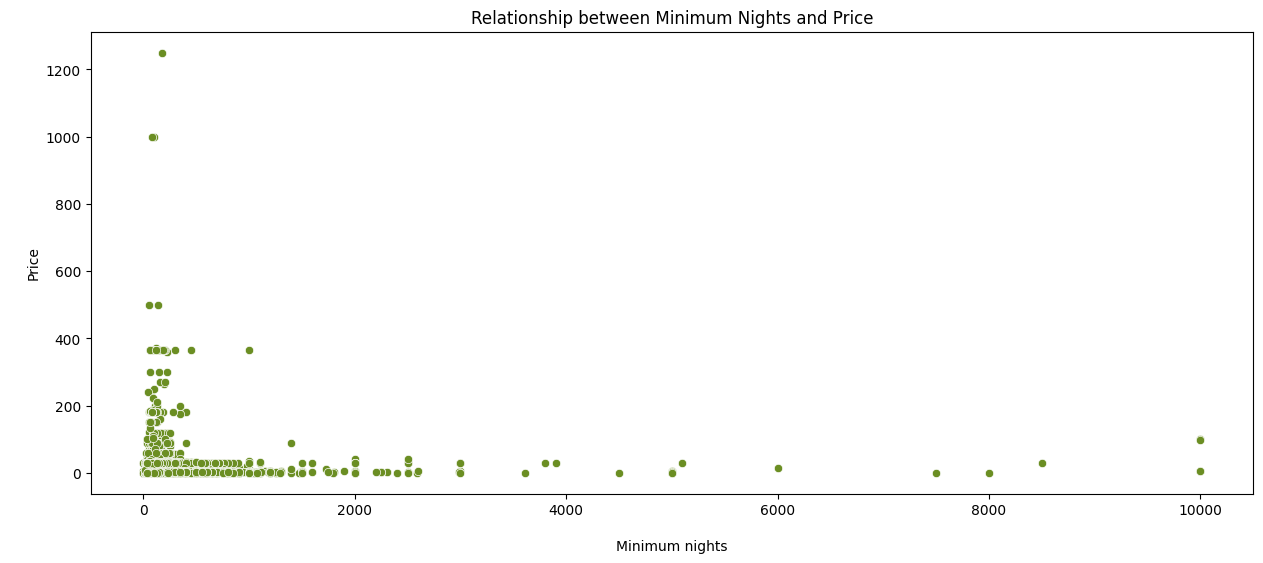

In [16]:
## Compare minimum_nights and price
plt.figure(figsize = (15,6))
sns.scatterplot(df, x = df['price'], y = df['minimum_nights'], color = colors[0])
plt.xlabel("\nMinimum nights")
plt.ylabel("\nPrice")
plt.title("Relationship between Minimum Nights and Price")

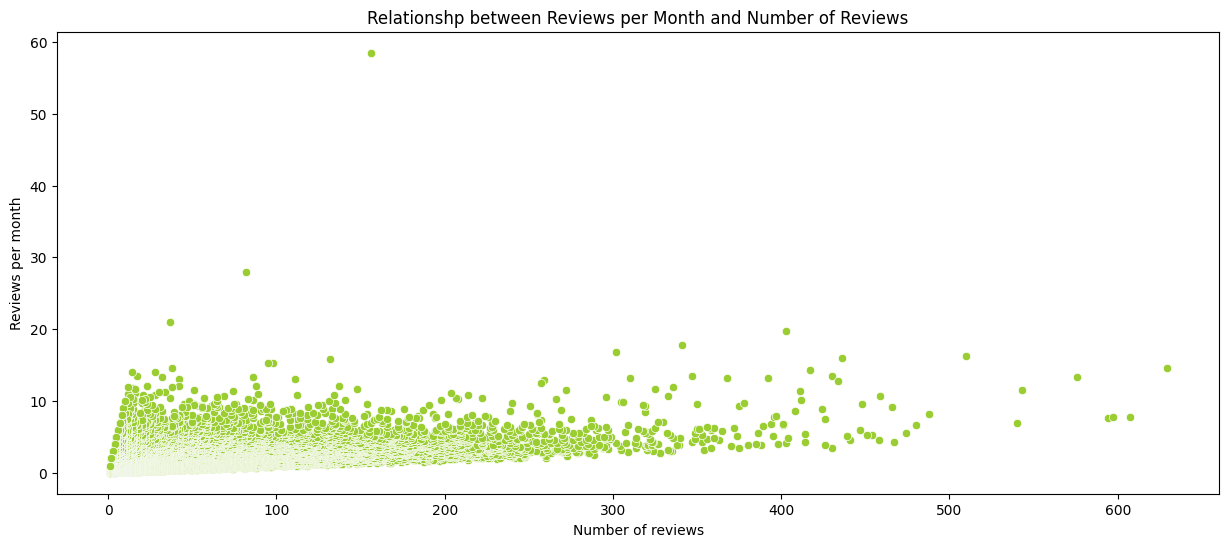

In [17]:
### Price distribution for the nights
plt.figure(figsize = (15,6))
sns.scatterplot(df, x = df['number_of_reviews'], y = df['reviews_per_month'], color = colors[1])
plt.xlabel("Number of reviews")
plt.ylabel("Reviews per month")
plt.title("Relationshp between Reviews per Month and Number of Reviews")
plt.show()

### Identifying Outliers

In [18]:
## identify minimum_nights ouliers using IQR method
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

upper_lim = Q3 + (1.5 * IQR)
lower_lim = Q1 - (1.5 * IQR)
n_outliers = df[(df['minimum_nights'] < lower_lim) | (df['minimum_nights'] > upper_lim)]

print("Lower limit:", lower_lim)
print("Upper limit:", upper_lim)
print("Count of outliers:", len(n_outliers))

n_outliers.head(3)

Lower limit: -3.5
Upper limit: 8.5
Count of outliers: 4464


,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
4,5022,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11,2018
6,5121,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,2017-10-05,0.40,1,0,10,2017
14,6090,Manhattan,West Village,Entire home/apt,120,90,27,2018-10-31,0.22,1,0,10,2018


In [19]:
### Dataframe without the outliers
mf = df[(df['minimum_nights'] > lower_lim) & (df['minimum_nights'] < upper_lim)]
print("Dataframe with outliers:", df.shape)
print("Dataframe without outliers:", mf.shape)
mf.head(3)

Dataframe with outliers: (38843, 13)
Dataframe without outliers: (34379, 13)


,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,10,2018
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,2019
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7,2019


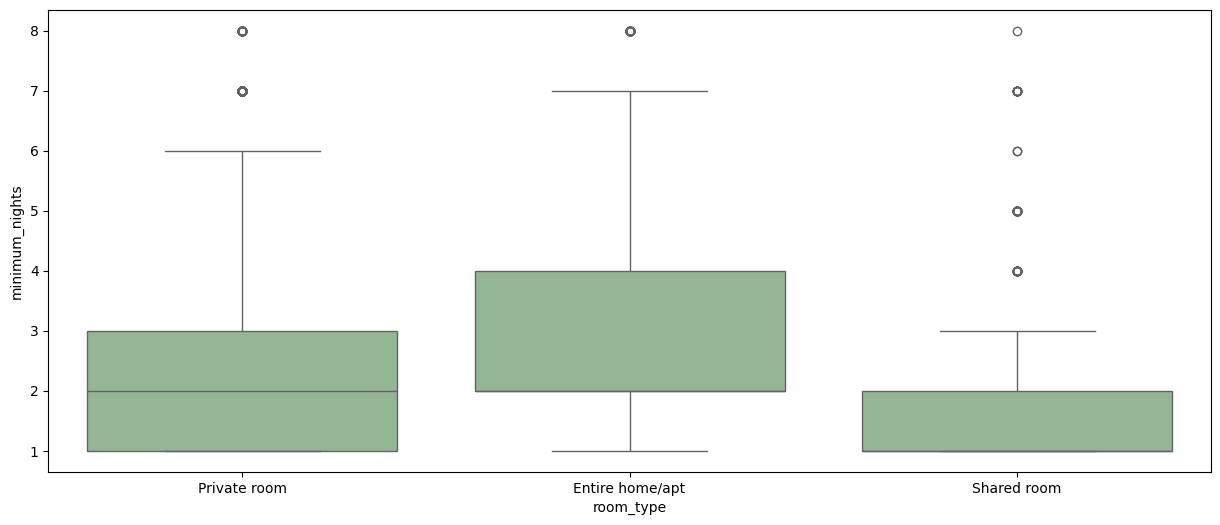

In [20]:
## Five number summary for the price of each room type (after having removed outliers)
plt.figure(figsize = (15,6))
sns.boxplot(mf, x = 'room_type', y = 'minimum_nights', color = colors[2])
plt.show()

In [21]:
## identify price ouliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_lim = Q3 + (1.5 * IQR)
lower_lim = Q1 - (1.5 * IQR)
p_outliers = df[(df['price'] < lower_lim) | (df['price'] > upper_lim)]

print("Lower limit:", lower_lim)
print("Upper limit:", upper_lim)
print("Count of outliers:", len(p_outliers))

p_outliers.head(3)

Lower limit: -82.5
Upper limit: 321.5
Count of outliers: 2077


,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
61,15396,Manhattan,Chelsea,Entire home/apt,375,180,5,2018-11-03,0.12,1,180,11,2018
85,19601,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,8,2016
103,23686,Manhattan,West Village,Entire home/apt,500,4,46,2019-05-18,0.55,2,243,5,2019


In [22]:
### Dataframe without the outliers
nf = df[(df['price'] > lower_lim) & (df['price'] < upper_lim)]
print("Dtaframe with outliers:", df.shape)
print("Dataframe without outliers:", nf.shape)
nf.head(3)

Dtaframe with outliers: (38843, 13)
Dataframe without outliers: (36766, 13)


,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,10,2018
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,2019
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7,2019


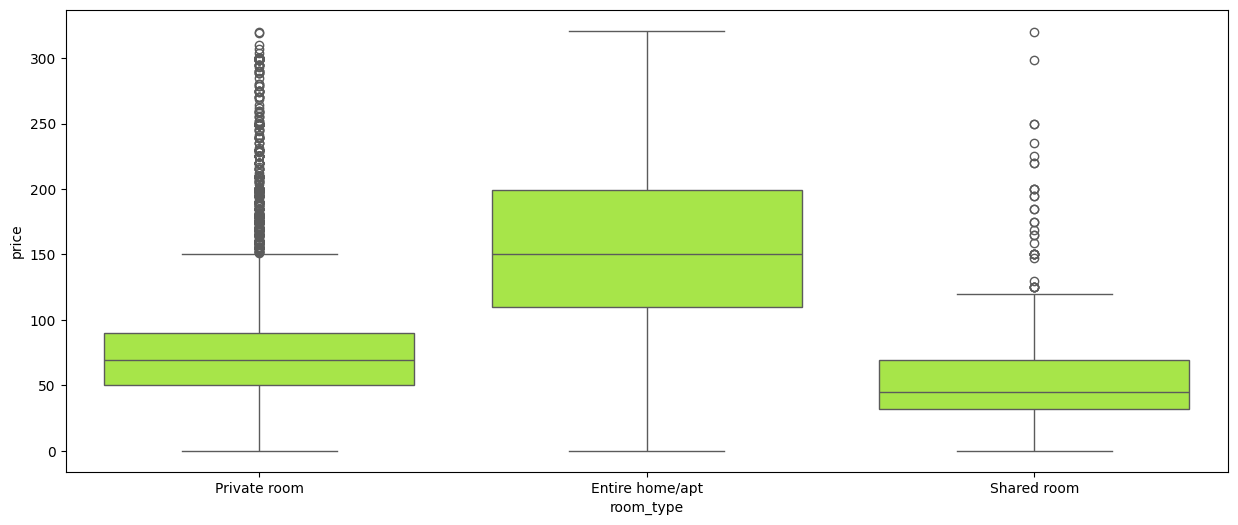

In [23]:
### new boxplot for price after removing outliers
plt.figure(figsize = (15,6))
sns.boxplot(nf, x = 'room_type', y = 'price', color = colors[3])
plt.show()

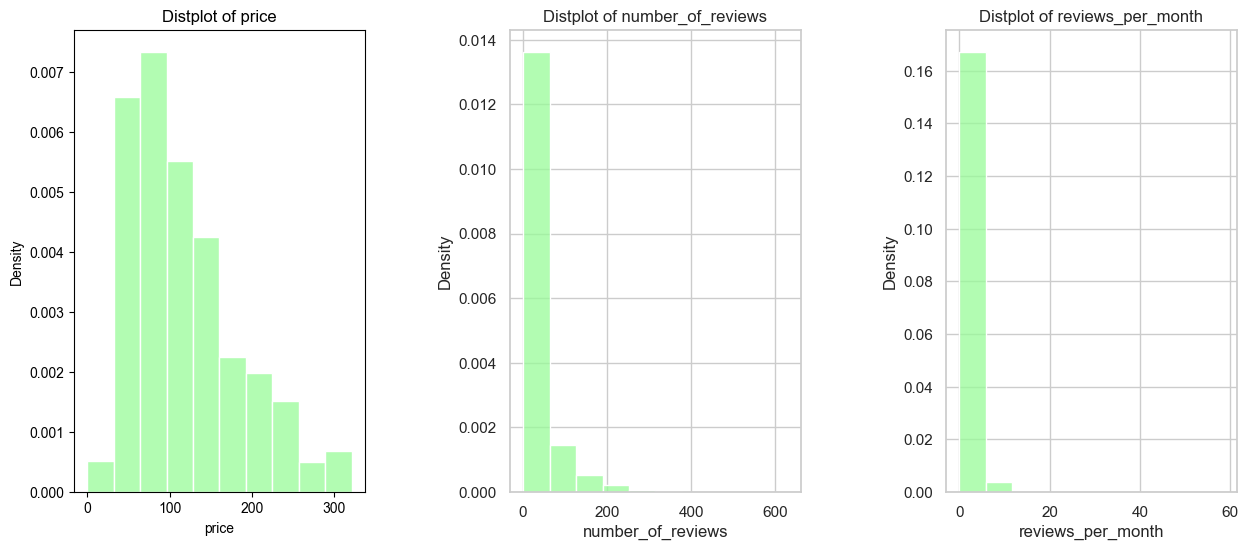

In [24]:
### Distribution plots
plt.figure(figsize = (15,6))
n = 0

for x in ['price', 'number_of_reviews', 'reviews_per_month']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(nf[x], kde=False, bins=10, color= colors[4], stat = 'density', kde_kws=dict(cut=3))
    plt.title(f"Distplot of {x}")
    
plt.show()

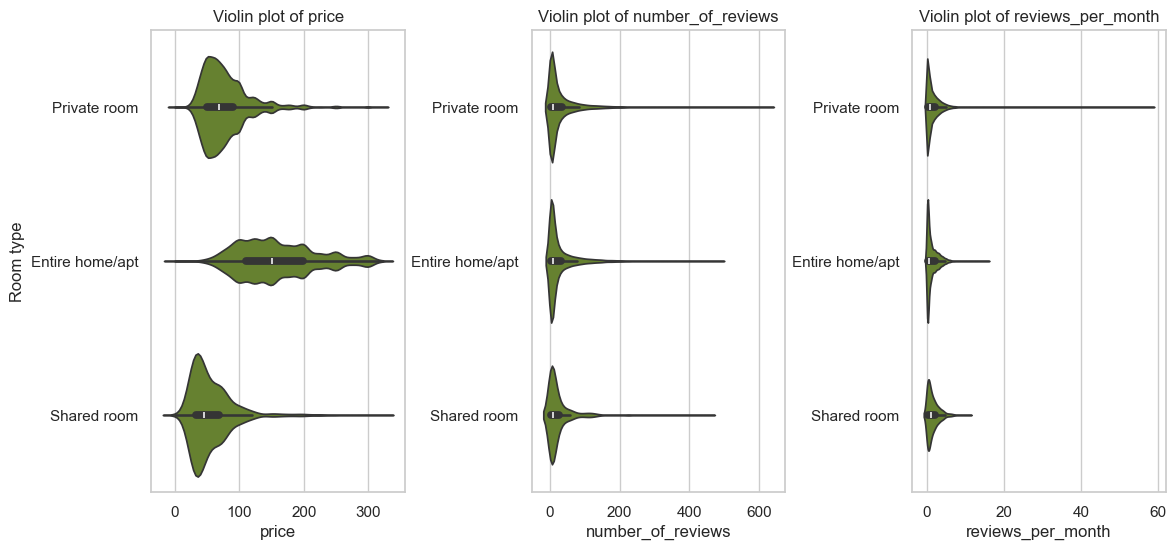

In [25]:
##### Violinplots for 'price', 'number_of_reviews' and 'reviews_per_month'

plt.figure(figsize = (18,6))
n = 0

for cols in ['price', 'number_of_reviews', 'reviews_per_month']:
    n += 1
    plt.subplot(1, 4, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'room_type', data = nf, color = colors[0])
    plt.ylabel('Room type' if n == 1 else  ' ')
    plt.title(f"Violin plot of {cols}")
    
plt.show()

### Feature Engineering

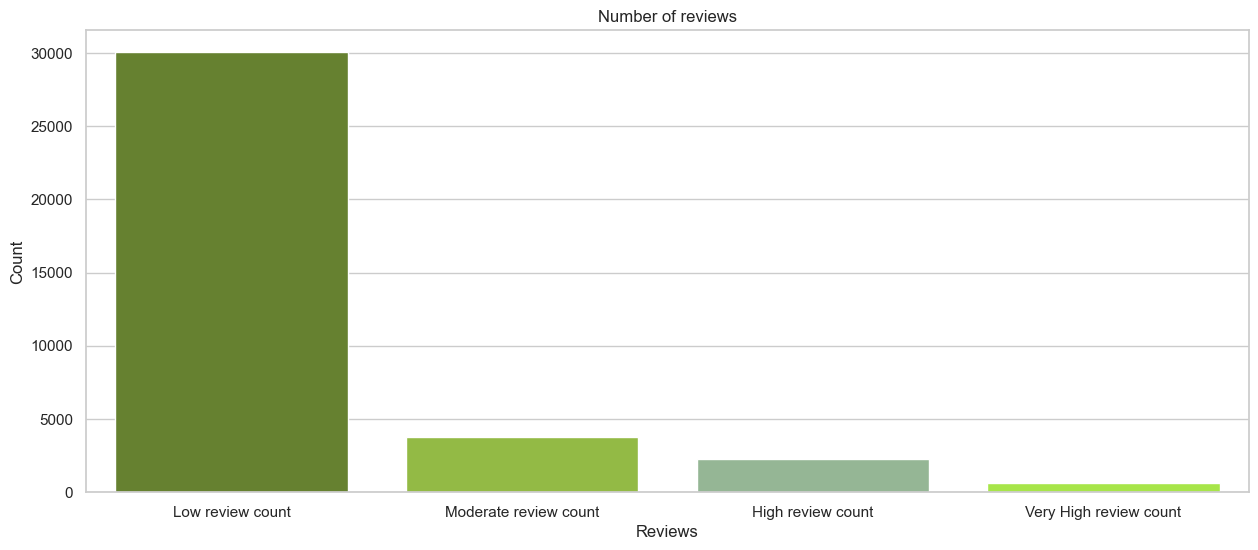

In [26]:
## Create ranks for hotels based on the number of ratings they have, and count them
low_reviews = nf[nf['number_of_reviews'] <= 50]
moderate_reviews = nf[(nf['number_of_reviews'] > 50) & (nf['number_of_reviews'] < 100)]
high_reviews = nf[(nf['number_of_reviews'] > 100) & (nf['number_of_reviews'] <= 200)]
very_high_reviews = nf[nf['number_of_reviews'] > 200]

x = ["Low review count", "Moderate review count", "High review count", "Very High review count"]
y = [len(low_reviews), len(moderate_reviews), len(high_reviews), len(very_high_reviews)]

plt.figure(figsize = (15,6))
sns.barplot(x = x, y = y, hue = x, palette = colors[0:4], legend = False)
plt.title("Number of reviews")
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

In [27]:
### let's print out the hotels that have a high number of reviews

print("The total number of 'hotels' with a very high review count in each New York district:")
very_high_reviews.groupby('neighbourhood_group')['neighbourhood'].count().sort_values(ascending = False)

The total number of 'hotels' with a very high review count in each New York district:


neighbourhood_group
Brooklyn         264
Manhattan        241
Queens           102
Bronx             13
Staten Island      3
Name: neighbourhood, dtype: int64

### K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

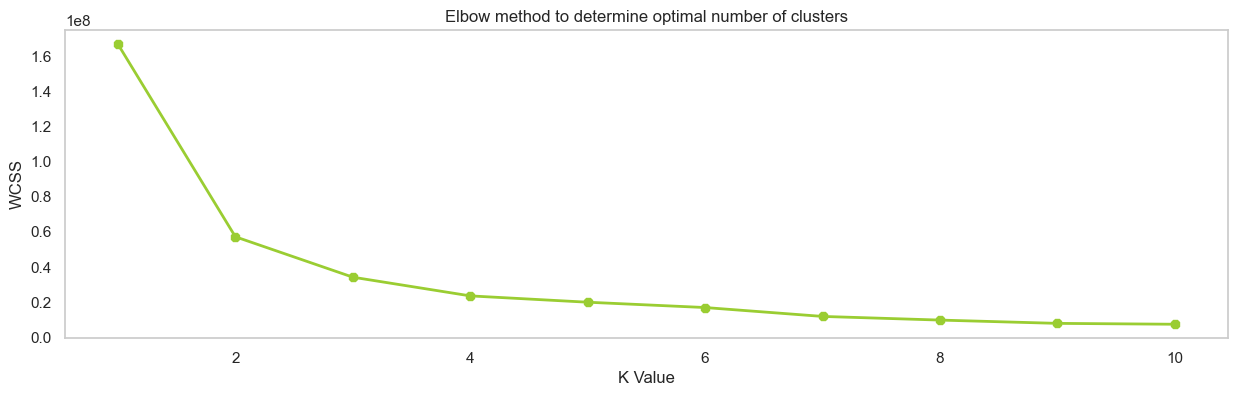

In [29]:
## Extract 'price' and 'minimum_nights' from df
## inititalize k-means algorithm
# Plot elbow method to determine most appropriate number of clusters

x1 = nf.loc[:, ['minimum_nights', 'price']].values
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,4))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color= colors[1], marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal number of clusters")
plt.show()

In [30]:
## Arrange values into appropriate clusters
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(x1)

print(label)

[0 1 2 ... 1 0 2]


In [31]:
## Determine the means of the clusters
print(kmeans.cluster_centers_)

[[  5.81255963 121.04206783]
 [  5.64299124 261.60419274]
 [  4.85052788  62.10909428]
 [  5.90461379 184.77604977]
 [320.42105263 119.71929825]]


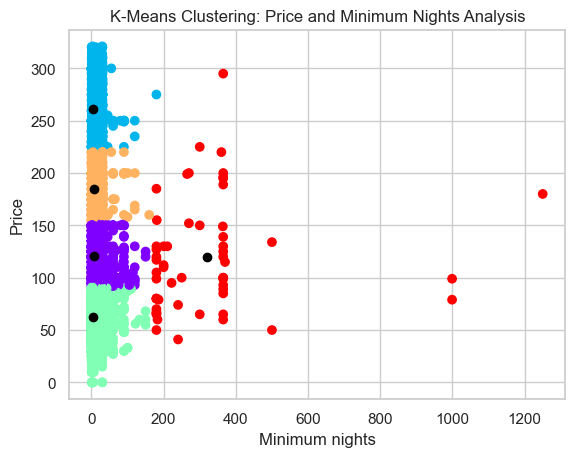

In [32]:
## Plot out the clusters
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means Clustering: Price and Minimum Nights Analysis', y = 1)
plt.xlabel('Minimum nights')
plt.ylabel('Price')
plt.show()

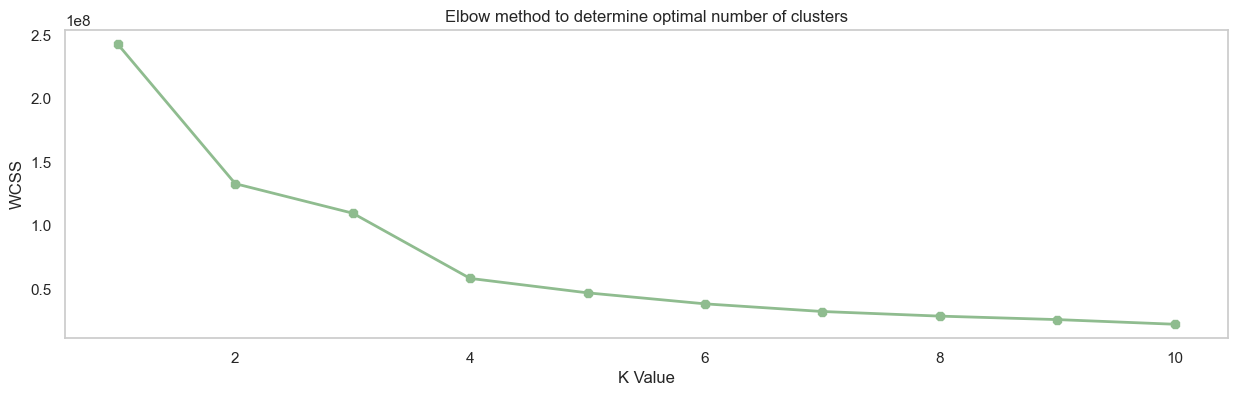

In [33]:
## Extract 'price' and 'number_of_reviews' from df
## inititalize k-means algorithm
# Plot elbow method to determine most appropriate number of clusters

x2 = nf.loc[:, ['number_of_reviews', 'price']].values
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color= colors[2], marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal number of clusters")
plt.show()

In [34]:
## Arrange values into appropriate clusters
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(x2)

print(label)

[4 0 2 ... 0 1 1]


In [35]:
## Determine the means of the clusters
print(kmeans.cluster_centers_)

[[ 21.31077877 236.58562831]
 [ 12.82535684  67.99592179]
 [226.09411765 117.2760181 ]
 [ 97.67521368  93.59103859]
 [ 14.1292129  144.3302914 ]]


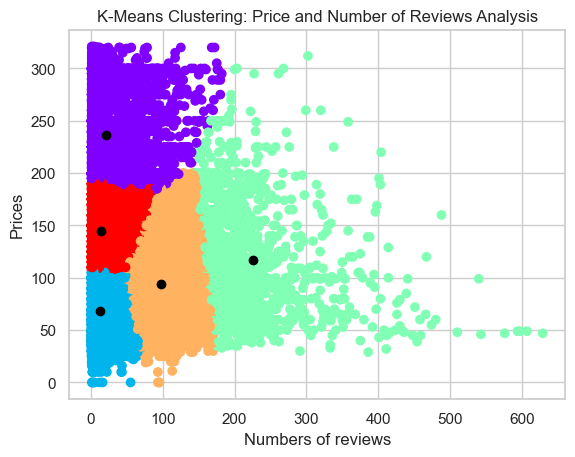

In [36]:
## Plot out the clusters
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means Clustering: Price and Number of Reviews Analysis')
plt.xlabel('Numbers of reviews')
plt.ylabel('Prices')
plt.show()

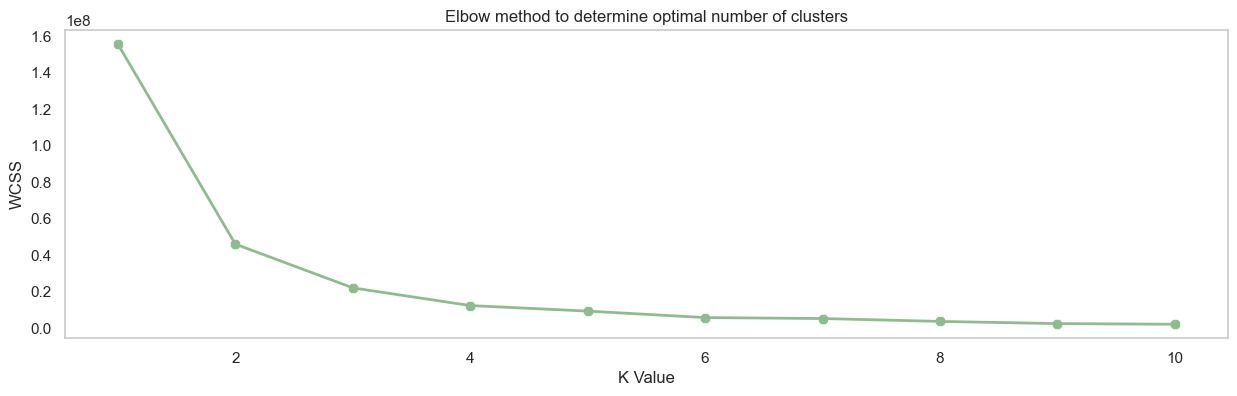

In [37]:
## Extract 'price' and 'number_of_reviews' from df
## inititalize k-means algorithm
# Plot elbow method to determine most appropriate number of clusters

x3 = nf.loc[:, ['reviews_per_month', 'price']].values
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color= colors[2], marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method to determine optimal number of clusters")
plt.show()

In [38]:
## Arrange values into appropriate clusters
kmeans = KMeans(n_clusters = 4)

label = kmeans.fit_predict(x3)

print(label)

[2 1 0 ... 1 0 3]


In [39]:
## Determine the means of the clusters
print(kmeans.cluster_centers_)

[[  1.40794478 106.88651634]
 [  1.29897644 257.15311273]
 [  1.24642398 169.94004283]
 [  1.45150908  57.92512025]]


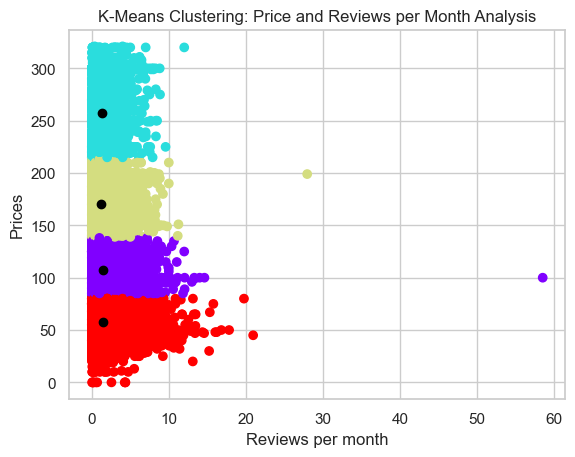

In [40]:
## Plot out the clusters
plt.scatter(x3[:,0], x3[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means Clustering: Price and Reviews per Month Analysis')
plt.xlabel('Reviews per month')
plt.ylabel('Prices')
plt.show()

### Correlation Matrix

In [41]:
## Extract the numerical columns from df
cf = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
cf.head()

,price,minimum_nights,number_of_reviews,reviews_per_month
0,149,1,9,0.21
1,225,1,45,0.38
3,89,1,270,4.64
4,80,10,9,0.10
5,200,3,74,0.59


In [42]:
## Determine the relationship between multiple column in cf
correlation_matrix = cf.corr()
correlation_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month
price,1.000000,0.025506,-0.035938,-0.030608
minimum_nights,0.025506,1.000000,-0.069368,-0.121702
number_of_reviews,-0.035938,-0.069368,1.000000,0.549868
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000


In [43]:
## Correlation between 'price' and 'minimum_nights', 'number_of_reviews' or 'reviews_per_month'
corr_nights = cf.corr().loc['price', 'minimum_nights']
corr_num_reviews = cf.corr().loc['price', 'number_of_reviews']
corr_monthly_reviews = cf.corr().loc['price', 'reviews_per_month']

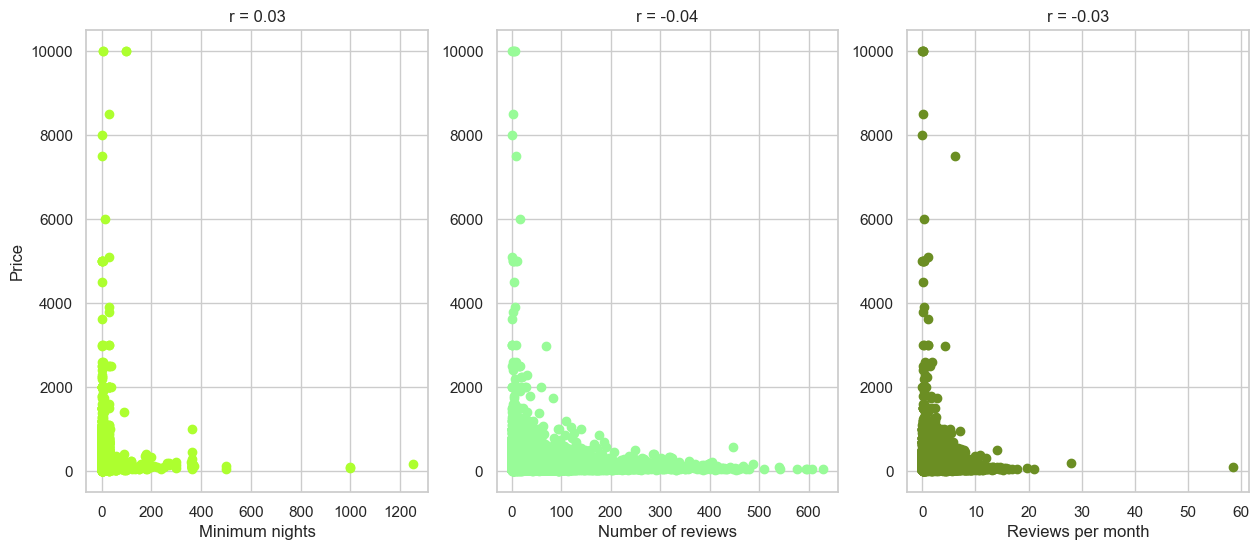

In [44]:
## Plot out the correlations between 'price' and 'minimum_nights', 'number_of_reviews' or 'reviews_per_month'
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))

ax[0].scatter(df['minimum_nights'], df['price'], color = colors[3])
ax[0].set_xlabel('Minimum nights')
ax[0].set_ylabel('Price')
ax[0].set_title('r = ' + str(round(corr_nights, 2)))

ax[1].scatter(df['number_of_reviews'], df['price'], color = colors[4])
ax[1].set_xlabel('Number of reviews')
ax[1].set_title('r = ' + str(round(corr_num_reviews, 2)))

ax[2].scatter(df['reviews_per_month'], df['price'], color = colors[0])
ax[2].set_xlabel('Reviews per month')
ax[2].set_title('r = ' + str(round(corr_monthly_reviews, 2)))

plt.show()

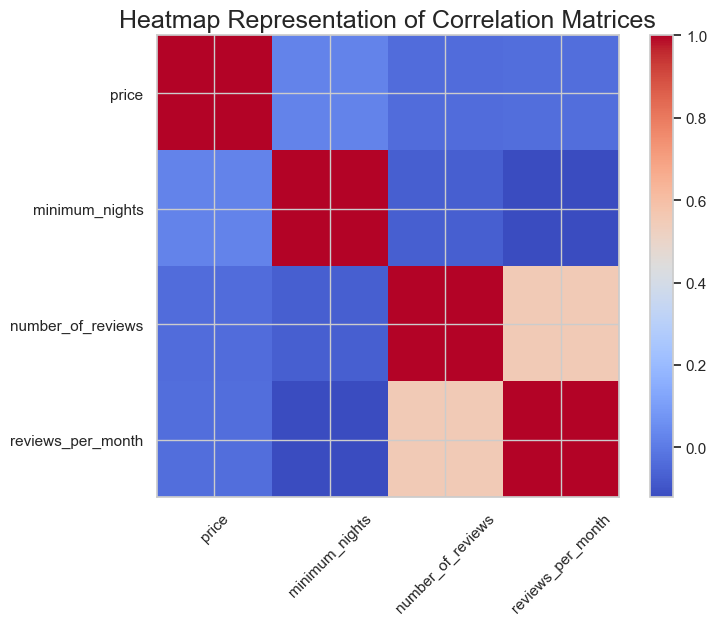

In [45]:
## Heatmap visualising correlation matrices
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap= 'coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Heatmap Representation of Correlation Matrices", fontsize = 18, y = 1)
plt.show()